# Project Proposal

TO BE UPDATED LATER

# Project Code

In [1]:
#Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Import & Cleaning

In [2]:
#Find Current Path & List of Files/Folders in Current Path
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through List of Files/Folders in Current Path
for item in current_directory:
    
    #Set Condtion for Folder Containing Airbnb Data
    if item.lower().find('airbnb') >= 0 and item.lower().find('ipynb') == -1:

        #Loop Through List of Files/Folders in Airbnb Data Folder
        for data in os.listdir(os.path.join(current_path, item)):
            
            #Set Condition for AirBnb Data CSV File
            if data.lower().find('nyc') >= 0 and data.lower().find('csv') >= 0:

                #Define Path Variable for Airbnb Data CSV File
                input_file = os.path.join(current_path, item, data)
        
    #Set Condition for Folder for Output Result Plot Images
    elif item.lower().find('images') >= 0:
            
        #Define Path Variable for Output Results Folder
        output_path = os.path.join(current_path, item)

In [3]:
#Import Raw Data from CSV File
raw_data = pd.read_csv(input_file)

raw_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#Clean Raw Data by Dropping Rows with Missing Information
cleaned_data = raw_data.dropna().reset_index(drop = True)

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [5]:
#Clean Raw Data by Dropping Rows with Incorrect Information
cleaned_data = cleaned_data[cleaned_data['latitude'] >= -90]
cleaned_data = cleaned_data[cleaned_data['latitude'] <= 90]
cleaned_data = cleaned_data[cleaned_data['longitude'] >= -180]
cleaned_data = cleaned_data[cleaned_data['longitude'] <= 180]
cleaned_data = cleaned_data[cleaned_data['price'] > 0]
cleaned_data = cleaned_data[cleaned_data['availability_365'] <= 365]

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


## Data Processing & Analysis

### NYC Complete Data

In [6]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)
#
#How many properties of each type are listed?
#How many unique hosts are present for each type of property?
#For the entire home/apt category, which properties are single-family buildings versus multi-family buildings.

### NYC Borough Data

In [7]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)
#
#How many properties of each type are listed within each borough?
#Is there a correlation between property price and minimum number of nights within each borough?
#What is the percentage of property types available within each borough?
#What is the average number of days available for each type of property in each borough?
#What is the average price for each type of property in each borough?
#What is the average number of minimum nights for each type of property in each borough?
#Out of all the boroughs, which one has the largest number of booked airbnbs? (booked airbnbs = no availability, so 
    #this means the highest number of airbnbs with no availabilitiy, or availability below a certain number of nights)
#Which borough has the highest average price for airbnbs?
#which borough had the overall highest number of reviews per month?

### NYC Neighborhood Data

In [8]:
#CURRENT IDEAS FOR PLOTS (THESE ARE IN NO PARTICULAR ORDER)
#
#In each borough, what are the 5 neighborhoods with the most reviews?
#In each borough, what are the 5 neighborhoods with the most of each property type?
#In each borough, what are the 5 neighborhoods with the highest average price for each property type?
#In each borough, what are the 5 neighborhoods with the lowest average price for each property type?
#In each borough, what are the 5 neighborhoods with the lowest average number of minimum nights?



In [9]:
#In each borough, what are the 5 neighborhoods with the most reviews?
most_reviews_df = cleaned_data[["neighbourhood_group","neighbourhood", "number_of_reviews" ]]
most_reviews_grouped = most_reviews_df.groupby(["neighbourhood_group", "neighbourhood"])
#finding the average of the top reviews per borough, per neighborhood
top_reviews_df = most_reviews_grouped.mean()

#Per borough, dataframe is sorted by highest amount of reviews in each neighborhood
top_reviews_sorted = top_reviews_df.sort_values(['neighbourhood_group', "number_of_reviews"], ascending = [True, False])
top_reviews_sorted.head()



number_of_reviews
neighbourhood_group neighbourhood                   
Bronx               Mount Eden             84.000000
                    Castle Hill            59.000000
                    Highbridge             58.227273
                    Baychester             51.666667
                    City Island            50.600000

In [44]:
#find neighborhoods with top 5 reviews PER BOROUGH
bronx_reviews = top_reviews_sorted.loc["Bronx"].head()
staten_island_reviews = top_reviews_sorted.loc["Staten Island"].head()
brooklyn_reviews = top_reviews_sorted.loc["Brooklyn"].head()
manhattan_reviews = top_reviews_sorted.loc["Manhattan"].head()
queens_reviews = top_reviews_sorted.loc["Queens"].head()

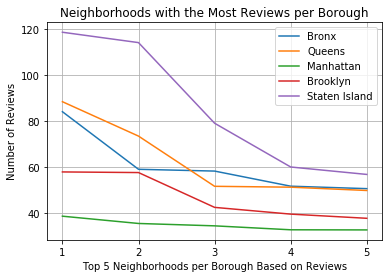

In [70]:
x_axis = [1,2,3,4,5]
xticks= [value for value in x_axis]
plt.plot(x_axis, bronx_reviews, label="Bronx")
plt.plot(x_axis, queens_reviews, label="Queens")
plt.plot(x_axis, manhattan_reviews, label="Manhattan")
plt.plot(x_axis, brooklyn_reviews, label="Brooklyn")
plt.plot(x_axis, staten_island_reviews, label="Staten Island")
plt.legend()
plt.xticks(xticks)
plt.ylabel("Number of Reviews")
plt.xlabel("Top 5 Neighborhoods per Borough Based on Reviews")
plt.title("Neighborhoods with the Most Reviews per Borough")
plt.grid()
plt.show()



In [26]:
#Starting question #2, "In each borough, what are the 5 neighborhoods with the most of each property type?"
property_type_df = cleaned_data[["neighbourhood_group","neighbourhood", "room_type" ]]
property_type_grouped = property_type_df.groupby(["neighbourhood_group","neighbourhood"])
property_type_count = property_type_grouped["room_type"].value_counts()

#isolating a borough and it's room type count
bronx_property = pd.DataFrame(property_type_count.loc["Bronx"])
bronx_property = bronx_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
bronx_property = bronx_property.reset_index()
bronx_property = bronx_property.set_index(["room_type"])

#Isolating private room counts for the bronx and sorting by highest type_count
bronx_property_private = bronx_property.loc["Private room"]
bronx_property_sorted = bronx_property_private.sort_values(["type_counts"],ascending=False)
bronx_property_sorted.head()


,neighbourhood,type_counts
room_type,,
Private room,Kingsbridge,35
Private room,Fordham,35
Private room,Longwood,32
Private room,Mott Haven,30
Private room,Wakefield,27


In [37]:
#Isolating private room counts for the bronx and sorting by highest type_count (displays top 5)
bronx_property_shared = bronx_property.loc["Shared room"]
bronx_shared_sorted = bronx_property_shared.sort_values(["type_counts"],ascending=False)
bronx_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Port Morris,15
Shared room,Van Nest,3
Shared room,Fordham,3
Shared room,Kingsbridge,3
Shared room,Parkchester,3


In [28]:
#isolating a borough and it's room type count
staten_property = pd.DataFrame(property_type_count.loc["Staten Island"])
staten_property = staten_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
staten_property = staten_property.reset_index()
staten_property = staten_property.set_index(["room_type"])

#Isolating private room counts for staten island and sorting by highest type_count
staten_property_private = staten_property.loc["Private room"]
staten_private_sorted = staten_property_private.sort_values(["type_counts"],ascending=False)
staten_private_sorted .head()

,neighbourhood,type_counts
room_type,,
Private room,Tompkinsville,25
Private room,Concord,19
Private room,Stapleton,16
Private room,St. George,15
Private room,West Brighton,12


In [38]:
#Isolating private room counts for staten island and sorting by highest type_count (displays top 5)
staten_property_shared = staten_property.loc["Shared room"]
staten_shared_sorted = staten_property_shared.sort_values(["type_counts"],ascending=False)
staten_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Clifton,2
Shared room,Concord,1
Shared room,Randall Manor,1
Shared room,South Beach,1


In [30]:
#isolating a borough and it's room type count
queens_property = pd.DataFrame(property_type_count.loc["Queens"])
queens_property = queens_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
queens_property = queens_property.reset_index()
queens_property = queens_property.set_index(["room_type"])

#Isolating private room counts for Queens and sorting by highest type_count
queens_property_private = queens_property.loc["Private room"]
queens_private_sorted = queens_property_private.sort_values(["type_counts"],ascending=False)
queens_private_sorted .head()

,neighbourhood,type_counts
room_type,,
Private room,Astoria,386
Private room,Flushing,264
Private room,Long Island City,223
Private room,Ridgewood,194
Private room,Sunnyside,167


In [39]:
#Isolating private room counts for Queens and sorting by highest type_count (displays top 5)
queens_property_shared = queens_property.loc["Shared room"]
queens_shared_sorted = queens_property_shared.sort_values(["type_counts"],ascending=False)
queens_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Corona,23
Shared room,Astoria,19
Shared room,Sunnyside,19
Shared room,Long Island City,11
Shared room,Jackson Heights,9


In [32]:
#isolating a borough and it's room type count
brooklyn_property = pd.DataFrame(property_type_count.loc["Brooklyn"])
brooklyn_property = brooklyn_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
brooklyn_property = brooklyn_property.reset_index()
brooklyn_property = brooklyn_property.set_index(["room_type"])

#Isolating private room counts for Brooklyn and sorting by highest type_count
brooklyn_property_private = brooklyn_property.loc["Private room"]
brooklyn_property_sorted = brooklyn_property_private.sort_values(["type_counts"],ascending=False)
brooklyn_property_sorted.head()


,neighbourhood,type_counts
room_type,,
Private room,Bedford-Stuyvesant,1628
Private room,Williamsburg,1573
Private room,Bushwick,1335
Private room,Crown Heights,597
Private room,Greenpoint,359


In [40]:
#Isolating private room counts for Brooklyn and sorting by highest type_count (displays top 5)
brooklyn_property_shared = brooklyn_property.loc["Shared room"]
brooklyn_shared_sorted = brooklyn_property_shared.sort_values(["type_counts"],ascending=False)
brooklyn_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Bedford-Stuyvesant,71
Shared room,Bushwick,34
Shared room,Williamsburg,21
Shared room,East Flatbush,18
Shared room,Flatbush,17


In [41]:
#isolating a borough and it's room type count
manhattan_property = pd.DataFrame(property_type_count.loc["Manhattan"])
manhattan_property = manhattan_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
manhattan_property = manhattan_property.reset_index()
manhattan_property = manhattan_property.set_index(["room_type"])

#Isolating private room counts for Manhattan and sorting by highest type_count
manhattan_property_private = manhattan_property.loc["Private room"]
manhattan_property_sorted = manhattan_property_private.sort_values(["type_counts"],ascending=False)
manhattan_property_sorted.head()


,neighbourhood,type_counts
room_type,,
Private room,Harlem,1290
Private room,Hell's Kitchen,558
Private room,East Village,524
Private room,Upper West Side,523
Private room,East Harlem,483


In [42]:
#Isolating private room counts for Brooklyn and sorting by highest type_count (displays top 5)
manhattan_property_shared = manhattan_property.loc["Shared room"]
manhattan_shared_sorted = manhattan_property_shared.sort_values(["type_counts"],ascending=False)
manhattan_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Hell's Kitchen,85
Shared room,East Harlem,42
Shared room,Upper East Side,36
Shared room,Harlem,35
Shared room,Upper West Side,23


In [55]:
#In each borough, what are the 5 neighborhoods with the highest average price for each property type?
price_df = cleaned_data[["neighbourhood_group","neighbourhood", "room_type", "price"]]

#reset index as boroughs
price_df = price_df.set_index(["neighbourhood_group"])
price_df

,neighbourhood,room_type,price
neighbourhood_group,,,
Brooklyn,Kensington,Private room,149
Manhattan,Midtown,Entire home/apt,225
Brooklyn,Clinton Hill,Entire home/apt,89
Manhattan,East Harlem,Entire home/apt,80
Manhattan,Murray Hill,Entire home/apt,200
Brooklyn,Bedford-Stuyvesant,Private room,60
Manhattan,Hell's Kitchen,Private room,79
Manhattan,Upper West Side,Private room,79
Manhattan,Chinatown,Entire home/apt,150


In [72]:
#isolating one borough - Bronx
average_price_bronx = price_df.loc["Bronx"]
average_price_bronx = average_price_bronx.reset_index()
average_price_bronx.drop("neighbourhood_group", axis=1, inplace=True)

bronx_price_grouped = average_price_bronx.groupby(["room_type", "neighbourhood", ])
bronx_average_price = bronx_price_grouped.mean()

bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, False])
#bronx_price_sorted

bronx_price_sorted = bronx_price_sorted.reset_index()
bronx_price_pivot = bronx_price_sorted.pivot(index="neighbourhood", columns="room_type", values="price")
bronx_price_pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Allerton,124.600000,67.409091,NaN
Baychester,90.333333,65.666667,NaN
Belmont,228.666667,53.375000,49.000000
Bronxdale,73.000000,40.800000,57.000000
Castle Hill,74.000000,NaN,NaN
City Island,109.777778,71.000000,NaN
Claremont Village,95.666667,52.900000,NaN
Clason Point,142.142857,82.666667,42.500000
Co-op City,NaN,77.500000,NaN


In [73]:
bronx_price_largest = bronx_price_pivot.nlargest(5,["Entire home/apt", "Private room", "Shared room"])
bronx_price_largest 

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Belmont,228.666667,53.375,49.0
Westchester Square,221.750000,52.000,NaN
Spuyten Duyvil,186.333333,60.000,NaN
Eastchester,184.800000,70.000,45.0
Unionport,183.750000,75.000,NaN


In [79]:
bronx_home = pd.DataFrame(bronx_price_pivot["Entire home/apt"])
bronx_home_sorted = bronx_home.sort_values(["Entire home/apt"],ascending=False)
bronx_home_sorted

,Entire home/apt
neighbourhood,
Belmont,228.666667
Westchester Square,221.750000
Spuyten Duyvil,186.333333
Eastchester,184.800000
Unionport,183.750000
Riverdale,168.500000
West Farms,165.000000
Williamsbridge,156.058824
Hunts Point,150.000000


# Project Observations & Conclusions

TO BE UPDATED LATER